# Series de Tiempo Avanzadas:
## Trabajo Final.

In [1]:
# JetBrains Datalore Notebooks
# Otoño 2021

# LIBRERIAS EXTRAS
!pip install pandas_datareader
!pip install darts
!pip install openpyxl

In [3]:
# LIBRERIAS UTILIZADAS

import pandas_datareader.data as web
import matplotlib.pyplot as plt
import datetime as dt
import pandas as pd
import numpy as np

from darts.metrics import mae, mape
from darts import TimeSeries
from darts.models import (
    FFT,
    AutoARIMA,
    ExponentialSmoothing,
    Prophet,
    Theta
)

import warnings
warnings.filterwarnings("ignore")
import logging
logging.disable(logging.CRITICAL)

## Lectura de datos: Precios diarios de 5 criptomonedas por un año.

In [4]:
# Monedas
coins = ['BTC-USD', 'DOGE-USD', 'XRP-USD', 'DASH-USD', 'ETH-USD']

# Fecha de inicio y final
start = dt.datetime(2020, 9, 20)
end = dt.datetime(2021,9,20)

data = web.DataReader(coins, 'yahoo', start,end)['Adj Close']
data

Symbols,BTC-USD,DOGE-USD,XRP-USD,DASH-USD,ETH-USD
Date,,,,,
2020-09-20,10938.271484,0.002778,0.246743,70.770134,371.052826
2020-09-21,10462.259766,0.002630,0.232138,67.060532,341.786072
2020-09-22,10538.459961,0.002656,0.233417,68.174866,344.503174
2020-09-23,10225.864258,0.002564,0.221657,65.063286,320.585541
2020-09-24,10745.548828,0.002644,0.233018,67.810181,349.356659
...,...,...,...,...,...
2021-09-17,47267.519531,0.239930,1.065598,198.482162,3398.538818
2021-09-18,48278.363281,0.241386,1.075668,199.406036,3432.018311
2021-09-19,47260.218750,0.233142,1.048428,192.936340,3329.447998


In [5]:
data.tail()

Symbols,BTC-USD,DOGE-USD,XRP-USD,DASH-USD,ETH-USD
Date,,,,,
2021-09-17,47267.519531,0.239930,1.065598,198.482162,3398.538818
2021-09-18,48278.363281,0.241386,1.075668,199.406036,3432.018311
2021-09-19,47260.218750,0.233142,1.048428,192.936340,3329.447998
2021-09-20,42843.800781,0.207071,0.917152,168.963470,2958.993408
2021-09-21,40693.675781,0.201027,0.876329,157.122787,2764.431152


## Analisis Exploratorio

In [18]:
# Estadísticas básicas
round(data.describe(),4)

Symbols,BTC-USD,DOGE-USD,XRP-USD,DASH-USD,ETH-USD
count,364.0000,364.0000,364.0000,364.0000,364.0000
mean,36864.3364,0.1447,0.6856,168.8022,1809.8977
std,15125.9153,0.1525,0.3968,82.5717,1044.5432
min,10225.8643,0.0025,0.2118,64.2784,320.5855
25%,23771.2593,0.0045,0.3183,102.5222,637.7636
50%,37333.6270,0.0590,0.5862,154.3280,1831.9836
75%,48907.2148,0.2631,0.9717,222.7217,2522.9576
max,63503.4570,0.6848,1.8392,440.8867,4168.7012


In [17]:
# Estadísticas básicas de la variación porcentual diara
round(data.pct_change().describe(),4)

Symbols,BTC-USD,DOGE-USD,XRP-USD,DASH-USD,ETH-USD
count,363.0000,363.0000,363.0000,363.0000,363.0000
mean,0.0045,0.0221,0.0075,0.0050,0.0071
std,0.0416,0.1892,0.0915,0.0761,0.0562
min,-0.1377,-0.4026,-0.4233,-0.3722,-0.2720
25%,-0.0169,-0.0335,-0.0336,-0.0316,-0.0238
50%,0.0035,-0.0004,0.0025,0.0036,0.0079
75%,0.0262,0.0292,0.0352,0.0368,0.0378
max,0.1875,2.7564,0.5601,0.5704,0.2595


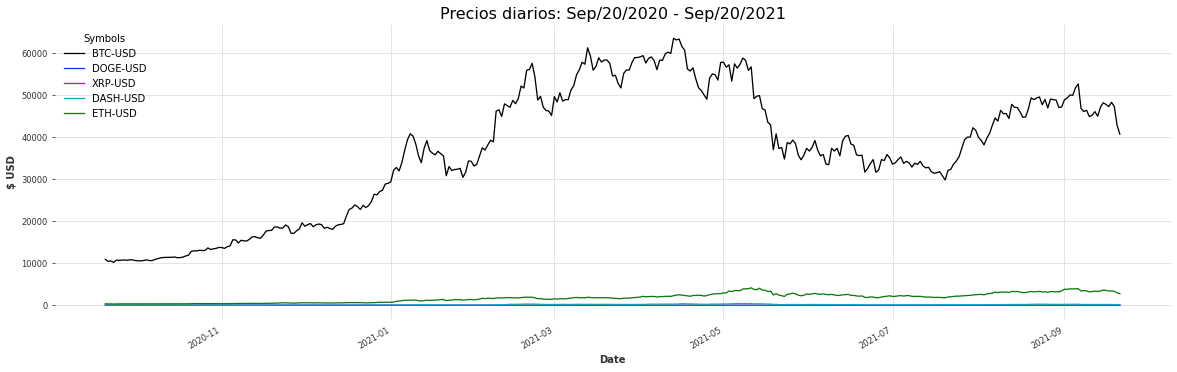

In [6]:
# Precios diarios
data.plot(figsize=(20,6))
plt.title('Precios diarios: Sep/20/2020 - Sep/20/2021', fontsize=16)
plt.ylabel('$ USD')
plt.show()

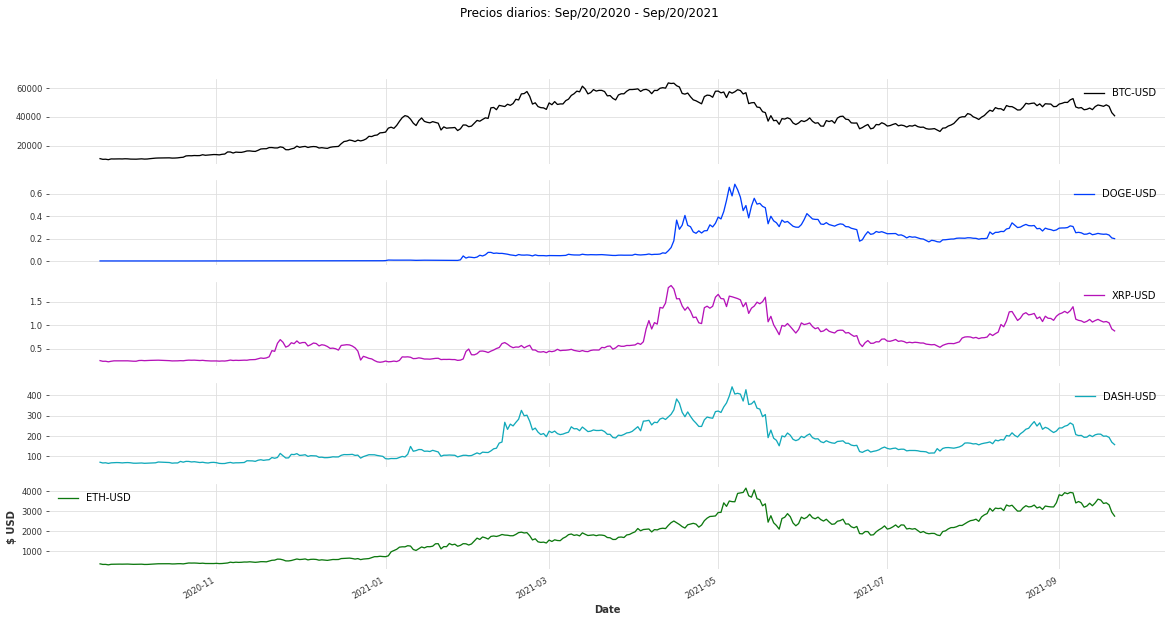

In [14]:
# Precios diarios
data.plot(figsize=(20,10), subplots=True, title='Precios diarios: Sep/20/2020 - Sep/20/2021')
plt.ylabel('$ USD')
plt.show()

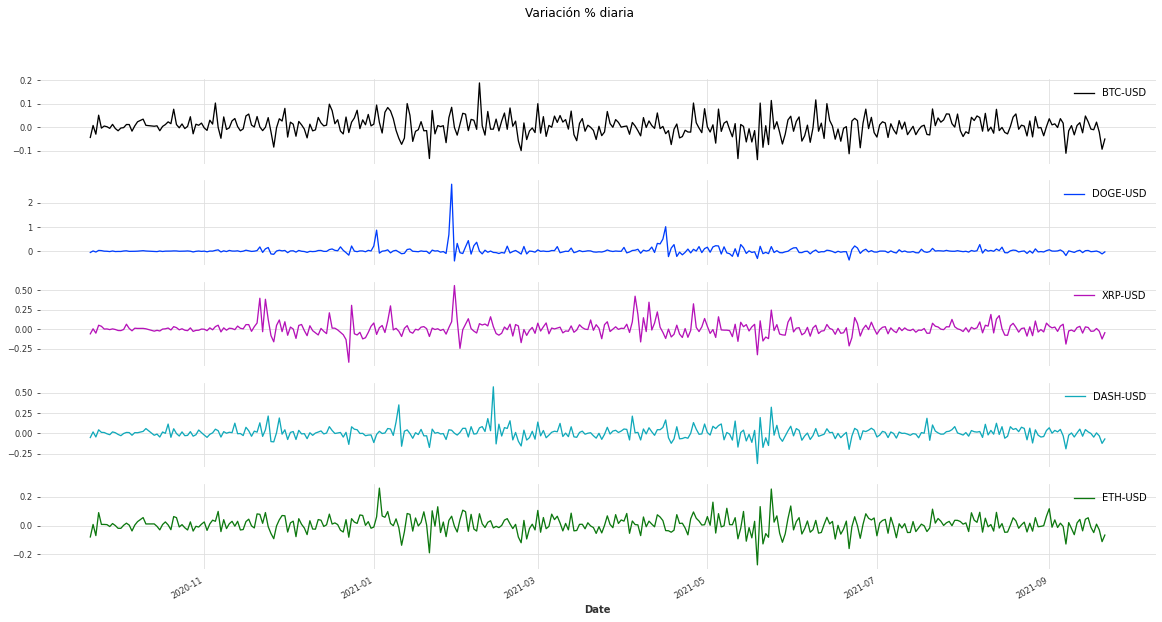

In [13]:
# Variación porcentual diaria de cada moneda
data.pct_change().plot(figsize=(20,10),subplots=True,
title='Variación % diaria')
plt.show()

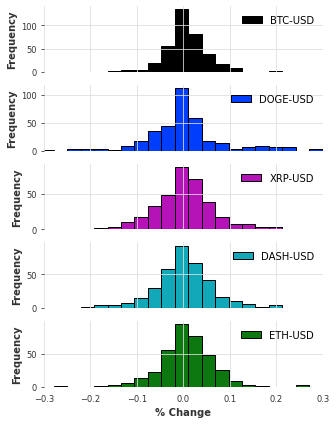

In [14]:
# Distribución de las variaciones porcentuales diarias de cada moneda
data.pct_change().plot.hist(subplots=True, bins=110, figsize=(5,7), ec='black')
plt.xlim([-0.3,0.3])
plt.xlabel('% Change')

## Análisis en R: Construcción de un portafolio de inversión con varianza mínima.

In [21]:
# Exportar datos a CSV para leerlos en R
data.to_csv('cryptos.csv')

<pre class="hljs" style="display: block; overflow-x: auto; padding: 0.5em; color: rgb(51, 51, 51); background: rgb(248, 248, 248);"><span class="hljs-comment" style="color: rgb(153, 153, 136); font-style: italic;"># CÓDIGO DE R</span>

<span class="hljs-comment" style="color: rgb(153, 153, 136); font-style: italic;"># Librerías usadas</span>
<span class="hljs-keyword" style="color: rgb(51, 51, 51); font-weight: 700;">library</span>(tseries)
<span class="hljs-keyword" style="color: rgb(51, 51, 51); font-weight: 700;">library</span>(readxl)
<span class="hljs-keyword" style="color: rgb(51, 51, 51); font-weight: 700;">library</span>(xts)

<span class="hljs-comment" style="color: rgb(153, 153, 136); font-style: italic;"># Importar datos</span>
df = read.csv(<span class="hljs-string" style="color: rgb(221, 17, 68);">"Code/R/cryptos.csv"</span>)

<span class="hljs-comment" style="color: rgb(153, 153, 136); font-style: italic;"># Datos en formato de serie temporal</span>
btc = xts(df$btc, order.by = as.Date(df$Date))
doge = xts(df$doge, order.by = as.Date(df$Date))
xrp = xts(df$xrp, order.by = as.Date(df$Date))
dash = xts(df$dash, order.by = as.Date(df$Date))
eth = xts(df$eth, order.by = as.Date(df$Date))

<span class="hljs-comment" style="color: rgb(153, 153, 136); font-style: italic;"># Retorno diario</span>
rbtc = diff(log(btc))
rdoge = diff(log(doge))
rxrp = diff(log(xrp))
rdash = diff(log(dash))
reth = diff(log(eth))

<span class="hljs-comment" style="color: rgb(153, 153, 136); font-style: italic;"># Matriz de datos y de covarianza</span>
retornos = cbind(rbtc, rdoge, rxrp, rdash, reth)
retornos = na.remove(retornos)
cov_matrix = cov(retornos)

<span class="hljs-comment" style="color: rgb(153, 153, 136); font-style: italic;"># Portafolio</span>
options(scipen=<span class="hljs-number" style="color: teal;">999</span>)
optimal = portfolio.optim(retornos, covmat= cov_matrix)
round(optimal$pw*<span class="hljs-number" style="color: teal;">100</span>,<span class="hljs-number" style="color: teal;">4</span>)</pre>

> [1] 54.2869 13.3054  0.0000  0.0000 32.4077

El portafolio óptimo tiene las siguientes ponderaciones:

  - BTC: 54.2869%
  - DOGE : 13.3054%
  - XRP: 0%
  - DASH: 0%
  - ETH: 32.4077%

## Análisis Exploratorio del Portafolio Óptimo

In [15]:
data['Portafolio'] = data['BTC-USD'] * 0.542869 + data['DOGE-USD'] * 0.133054 + data['ETH-USD'] * 0.324077

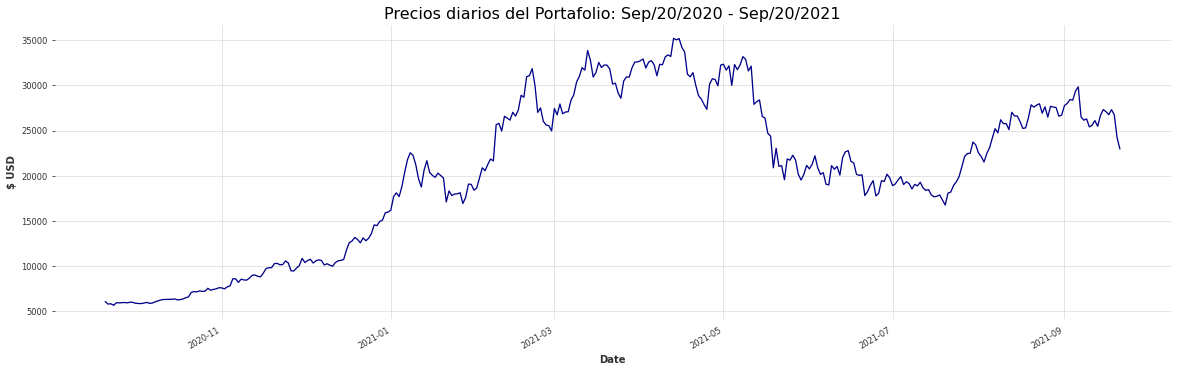

In [16]:
data['Portafolio'].plot(figsize=(20,6), color='darkblue')
plt.title('Precios diarios del Portafolio: Sep/20/2020 - Sep/20/2021', fontsize=16)
plt.ylabel('$ USD')
plt.show()

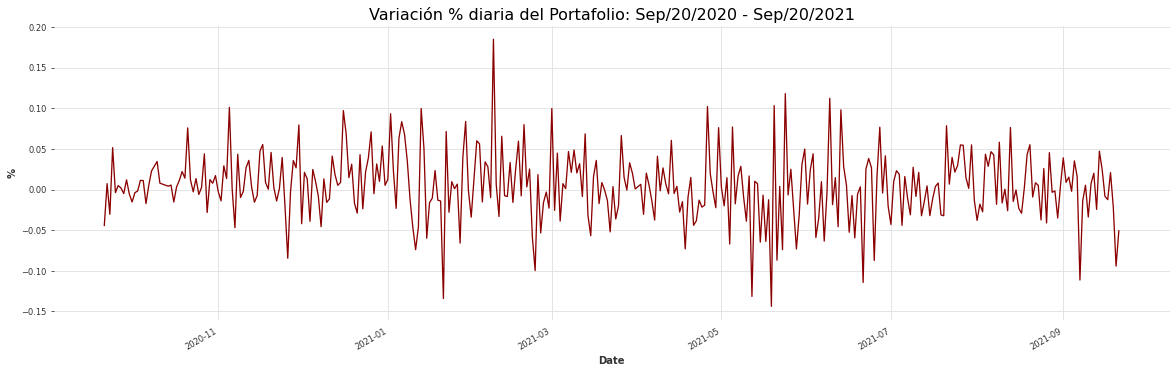

In [17]:
data['Portafolio'].pct_change().plot(figsize=(20,6), color='darkred')
plt.title('Variación % diaria del Portafolio: Sep/20/2020 - Sep/20/2021', fontsize=16)
plt.ylabel('%')
plt.show()

In [18]:
# Estadísticas Básicas
round(data['Portafolio'].describe(),4)

In [19]:
# Estadísticas Básicas variación porcentual diaria
round(data['Portafolio'].pct_change().describe(),4)

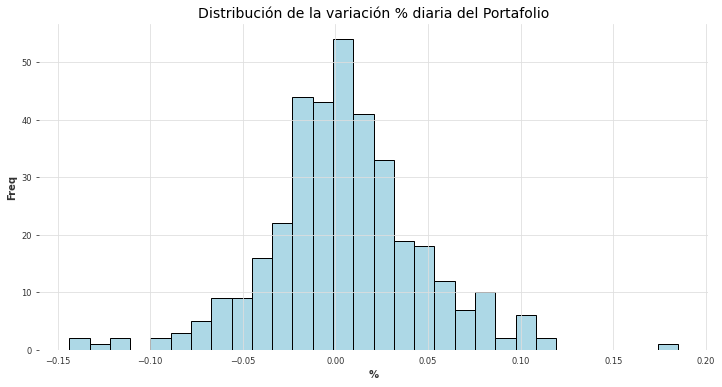

In [20]:
plt.figure(figsize=(12,6))
plt.hist(data['Portafolio'].pct_change(), bins=30, color='lightblue', ec='black')
plt.title('Distribución de la variación % diaria del Portafolio', fontsize=14)
plt.xlabel('%')
plt.ylabel('Freq')
plt.show()

## Pronóstioco para Portafolio Óptimo.

Realización de un pronóstico para 10 días y su contrastación con los precios reales de esos 10 días.

In [4]:
# Nueva lectura de datos con 10 días más

# Monedas
coins = ['BTC-USD', 'DOGE-USD', 'XRP-USD', 'DASH-USD', 'ETH-USD']

start = dt.datetime(2020, 9, 20)
#end = dt.datetime(2021,9,20)
end = dt.datetime(2021,9,30) #10 días

# Portafolio Óptimo según análisis en R
data = web.DataReader(coins, 'yahoo', start,end)['Adj Close']
data['Portafolio'] = data['BTC-USD'] * 0.542869 + data['DOGE-USD'] * 0.133054 + data['ETH-USD'] * 0.324077

data = data.head(len(data)-1)
data

Symbols,BTC-USD,DOGE-USD,XRP-USD,DASH-USD,ETH-USD,Portafolio
Date,,,,,,
2020-09-20,10938.271484,0.002778,0.246743,70.770134,371.052826,6058.298559
2020-09-21,10462.259766,0.002630,0.232138,67.060532,341.786072,5790.401851
2020-09-22,10538.459961,0.002656,0.233417,68.174866,344.503174,5832.649129
2020-09-23,10225.864258,0.002564,0.221657,65.063286,320.585541,5655.199445
2020-09-24,10745.548828,0.002644,0.233018,67.810181,349.356659,5946.644157
...,...,...,...,...,...,...
2021-09-26,43208.539062,0.204962,0.944721,162.029648,3062.265381,24449.013441
2021-09-27,42235.730469,0.200262,0.923685,153.997772,2934.138916,23879.382347
2021-09-28,41034.542969,0.196804,0.893689,147.274338,2807.296631,23186.187763


In [5]:
# Formato de Serie Temporal
ts = data['Portafolio']
ts = TimeSeries.from_series(ts, freq='D')
ts

<TimeSeries (DataArray) (Date: 376, component: 1, sample: 1)>
array([[[ 6058.29855874]],

 [[ 5790.40185142]],

 [[ 5832.64912899]],

 [[ 5655.19944522]],

 [[ 5946.64415653]],

 [[ 5924.06941206]],

 [[ 5953.28717163]],

 [[ 5964.90237893]],

 [[ 5935.30779475]],

 [[ 6006.14975424]],

...

 [[22987.2503797 ]],

 [[24652.74560181]],

 [[25394.81933252]],

 [[24206.48666695]],

 [[24137.65083973]],

 [[24449.01344117]],

 [[23879.38234698]],

 [[23186.1877627 ]],

 [[23488.66891603]],

 [[24745.52140949]]])
Coordinates:
 * Date (Date) datetime64[ns] 2020-09-20 2020-09-21 ... 2021-09-30
 * component (component) object 'Portafolio'
Dimensions without coordinates: sample TimeSeries (DataArray) Date : 376 component : 1 sample : 1 6.058e+03 5.79e+03 5.833e+03 ... 2.319e+04 2.349e+04 2.475e+04 array([[[ 6058.29855874]],

 [[ 5790.40185142]],

 [[ 5832.64912899]],

 [[ 5655.19944522]],

 [[ 5946.64415653]],

 [[ 5924.06941206]],

 [[ 5953.28717163]],

 [[ 5964.90237893]],

 [[ 5935.30779475]],

 [[ 6006.14975424]],

...

 [[22987.2503797 ]],

 [[24652.74560181]],

 [[25394.81933252]],

 [[24206.48666695]],

 [[24137.65083973]],

 [[24449.01344117]],

 [[23879.38234698]],

 [[23186.1877627 ]],

 [[23488.66891603]],

 [[24745.52140949]]]) Coordinates: (2) Date (Date) datetime64[ns] 2020-09-20 ... 2021-09-30 array(['2020-09-20T00:00:00.000000000', '2020-09-21T00:00:00.000000000',
 '2020-09-22T00:00:00.000000000', ..., '2021-09-28T00:00:00.000000000',
 '2021-09-29T00:00:00.000000000', '2021-09-30T00:00:00.000000000'],
 dtype='datetime64[ns]') component (component) object 'Portafolio' array(['Portafolio'], dtype=object) Attributes: (0)

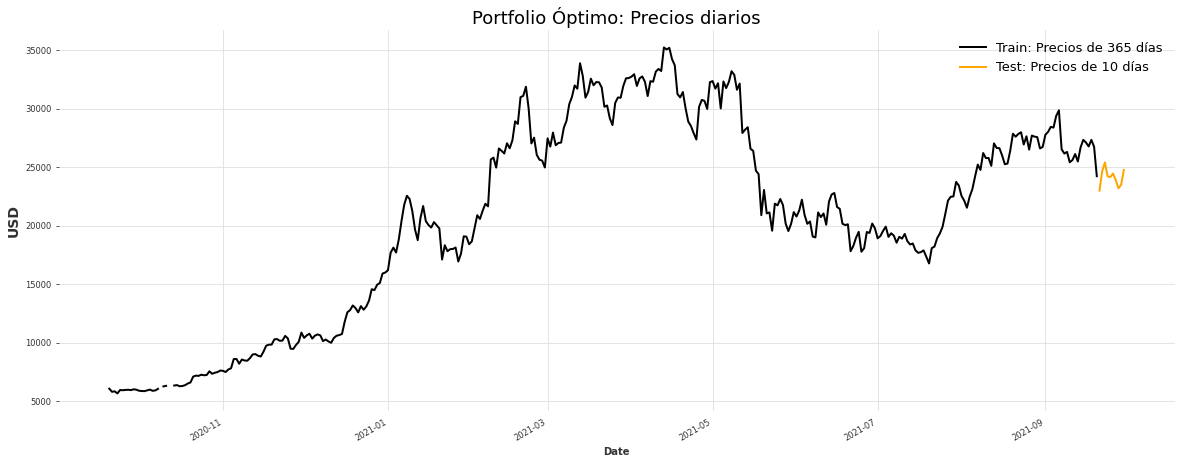

In [6]:
# Como se esta haciendo un pronóstico para los últimos 10 días, se separa la serie temporal en 2 conjuntos:
# Train: Conjunto de datos de entrenamiento con el que se hará el pronóstico
# Test: Conjunto de datos con el que se evaluará el pronóstico

# Separación de datos
sep = '2021-09-20 00:00:00'
train, test = ts.split_after(pd.Timestamp(sep))


# Gráfica de conjunto de prueba y entrenamiento
plt.figure(figsize=(20,7))
train.plot(label='Train: Precios de 365 días')
test.plot(label=f'Test: Precios de {len(test)} días', color='orange')
plt.title('Portfolio Óptimo: Precios diarios', fontsize=18)
plt.ylabel('USD', fontsize=14)
plt.legend(fontsize=13)
plt.show()

In [8]:
# Rellenar valores vacíos
ts = data['Portafolio']
ts = TimeSeries.from_series(ts, freq='D',fillna_value=data['Portafolio'].median())
sep = '2021-09-20 00:00:00'
train, test = ts.split_after(pd.Timestamp(sep))

In [9]:
# Comparación de distintos modelos
models = [
    AutoARIMA(),
    Prophet(),
    ExponentialSmoothing(),
    Theta(),
    FFT()
]

for model in models:
    model.fit(train)
    pred_val = model.predict(len(test))
    print(str(model)+": Error = ±" + str(np.round(mae(pred_val, test),3)), 'USD')
    print(str(model)+": Precisión =", str(np.round(100-mape(pred_val, test),3)) +"%\n")

Auto-ARIMA: Error = ±1154.315 USD
Auto-ARIMA: Precisión = 95.424%

Prophet: Error = ±4432.6 USD
Prophet: Precisión = 84.491%

Exponential smoothing: Error = ±1234.249 USD
Exponential smoothing: Precisión = 95.12%

Theta(2): Error = ±1359.454 USD
Theta(2): Precisión = 94.665%

FFT(nr_freqs_to_keep=10, trend=None): Error = ±10306.465 USD
FFT(nr_freqs_to_keep=10, trend=None): Precisión = 23.176%



Los mejores modelos predictivos en este caso fueron autoARIMA y Exponential Smoothing.
Ambos, al comparar sus pronósticos con los datos reales, tuvieron una precisión del 95%.

Auto-ARIMA: Error = ±1154.315 USD
Auto-ARIMA: Precisión = 95.424%



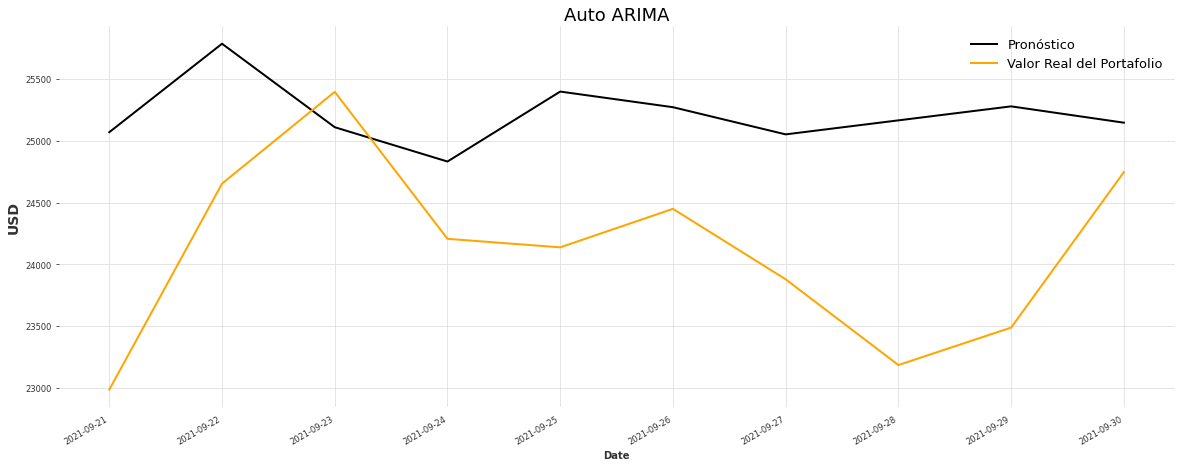

In [10]:
# AutoARIMA
model = AutoARIMA()
model.fit(train)
pred_val = model.predict(len(test))

plt.figure(figsize=(20,7))
pred_val.plot(label='Pronóstico')
test.plot(label='Valor Real del Portafolio', color='orange')
plt.title('Auto ARIMA', fontsize=18)
plt.ylabel('USD', fontsize=14)
plt.legend(fontsize=13)
plt.show()

print(str(model)+": Error = ±" + str(np.round(mae(pred_val, test),3)), 'USD')
print(str(model)+": Precisión =", str(np.round(100-mape(pred_val, test),3)) +"%\n")

Exponential smoothing: Error = ±1234.249 USD
Exponential smoothing: Precisión = 95.12%



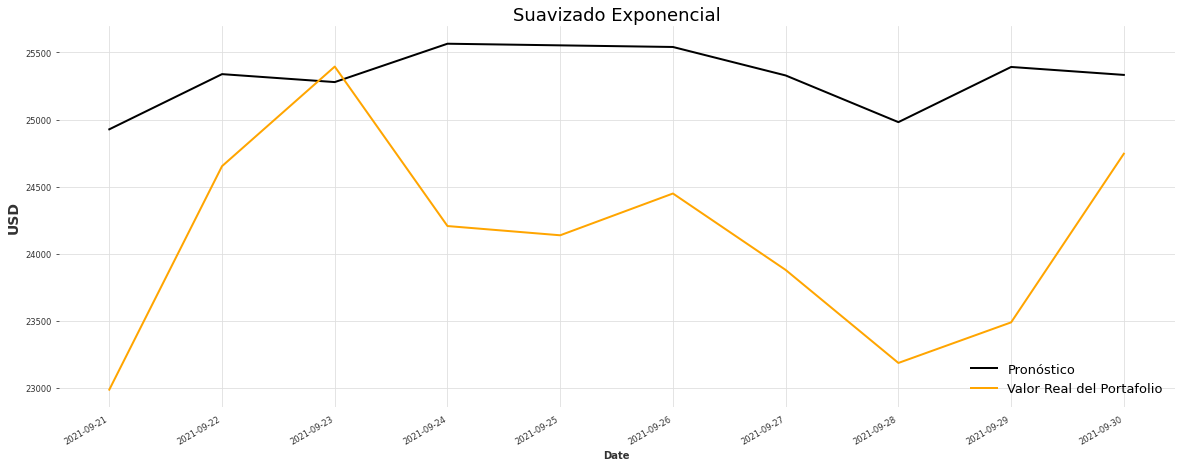

In [11]:
# Suavizado Exponencial
model = ExponentialSmoothing()
model.fit(train)
pred_val = model.predict(len(test))

plt.figure(figsize=(20,7))
pred_val.plot(label='Pronóstico')
test.plot(label='Valor Real del Portafolio', color='orange')
plt.title('Suavizado Exponencial', fontsize=18)
plt.ylabel('USD', fontsize=14)
plt.legend(fontsize=13)
plt.show()

print(str(model)+": Error = ±" + str(np.round(mae(pred_val, test),3)), 'USD')
print(str(model)+": Precisión =", str(np.round(100-mape(pred_val, test),3)) +"%\n")

Ambos pronósticos tuvieron una precisión arriba del 95% y los resultados reales durante el periodo evaluado de 10 días fue mejor de lo esperado.

In [12]:
precio_20_sep = data['Portafolio'].loc['2021-09-20 00:00:00']
precio_30_sep = data['Portafolio'].tail(1).values

# Ganancia absoluta
ganancia_abs = (precio_30_sep-precio_20_sep)
ganancia_abs

In [13]:
#Ganancia Relativa
ganancia_rel = (precio_30_sep-precio_20_sep)/precio_20_sep
ganancia_rel*100